In [1]:
!pip install pennylane

Librerias necesarias

In [2]:
import pennylane as qml
from pennylane import numpy as np
import matplotlib.pyplot as plt

In [3]:
NUM_QUBITS = 2
wires = list(range(NUM_QUBITS))

dev = qml.device("default.mixed", wires=NUM_QUBITS, shots=1024)

C:\Users\Usuario\anaconda3\Lib\site-packages\pennylane\devices\device_api.py:193: PennyLaneDeprecationWarning: Setting shots on device is deprecated. Please use the `set_shots` transform on the respective QNode instead.
  warnings.warn(


In [4]:
def equal_superposition(wires):
    for wire in wires:
        qml.Hadamard(wires=wire)

def oracle(wires, omega):
    for w, bit in enumerate(omega):
        if bit == 0:
            qml.PauliX(wires=w)
    qml.ctrl(qml.PauliZ, control=wires[0])(wires[1])
    for w, bit in enumerate(omega):
        if bit == 0:
            qml.PauliX(wires=w)

def diffusion_operator(wires):
    for wire in wires:
        qml.Hadamard(wires=wire)
        qml.PauliX(wires=wire)
    qml.ctrl(qml.PauliZ, control=wires[0])(wires[1])
    for wire in wires:
        qml.PauliX(wires=wire)
        qml.Hadamard(wires=wire)

In [5]:
# --- Canal de ruido ---
def add_noise():
    """Aplica un poco de depolarización a cada qubit para simular NISQ."""
    for wire in wires:
        qml.DepolarizingChannel(0.02, wires=wire)  # 2% de ruido por qubit

# --- Circuito principal ---
@qml.qnode(dev)
def grover_noisy():
    equal_superposition(wires)
    omega = np.array([0, 0])
    oracle(wires, omega)
    diffusion_operator(wires)
    add_noise()  # agregamos ruido al final
    return qml.sample(wires=wires)




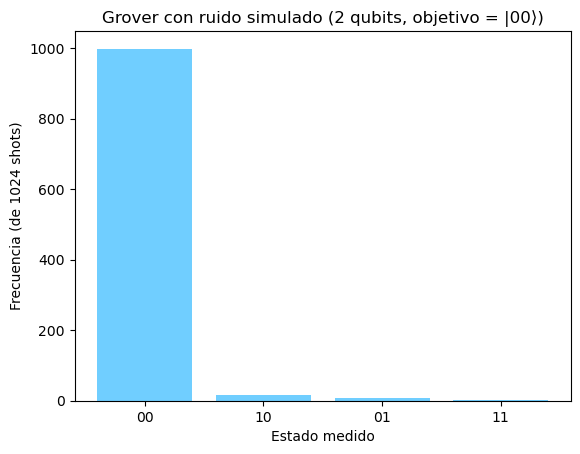

Resultados con ruido: {'00': 999, '10': 15, '01': 9, '11': 1}


In [6]:
# --- Ejecución ---
samples = grover_noisy()

# Contamos los resultados
counts = {}
for s in samples:
    key = "".join(str(int(x)) for x in s)
    counts[key] = counts.get(key, 0) + 1

# --- Visualización ---
plt.bar(counts.keys(), counts.values(), color="#70CEFF")
plt.xlabel("Estado medido")
plt.ylabel("Frecuencia (de 1024 shots)")
plt.title("Grover con ruido simulado (2 qubits, objetivo = |00⟩)")
plt.show()

print("Resultados con ruido:", counts)

In [7]:
expected_result = "00"
hits = counts.get(expected_result, 0)
shots=1024
fidelity = hits / shots

print(f"Fidelidad clásica respecto al estado objetivo '{expected_result}': {fidelity:.4f}")


Fidelidad clásica respecto al estado objetivo '00': 0.9756


In [8]:
print(qml.__version__)


0.43.0
